In [3]:
import pandas as pd
import numpy as np
import sys, os

# Pull in Observed Solar Radiation Data

In [4]:
def get_df(location_id):
    df = pd.DataFrame()
    for year in range(2006, 2011):
        year_df = pd.read_csv("data/NSRDB_StationData_19910101_20101231_" + str(location_id) +"/NSRDB_StationData_" + str(year) +"0101_" + str(year) +"1231_" + str(location_id) +".csv")
        df = pd.concat([df, year_df])
    return df

In [5]:
newark_df = get_df(725020)
laguardia_df = get_df(725030)
li_macarthur_df = get_df(725035)
bridgeport_df = get_df(725040)
jfk_df = get_df(744860)

In [9]:
# Number of rows is years * days * hours + leap_years * hours

# assert newark_df.shape == (20*365*24 + 5*24, 49)
# assert laguardia_df.shape == (20*365*24 + 5*24, 49)
# assert li_macarthur_df.shape == (20*365*24 + 5*24, 49)
# assert bridgeport_df.shape == (20*365*24 + 5*24, 49)
# assert jfk_df.shape == (20*365*24 + 5*24, 49)

In [10]:
def make_timestamp_str(row):
    if str(row['HH:MM (LST)']) == '24:00':
        string = str(pd.to_datetime(row['YYYY-MM-DD']) + pd.DateOffset(1))
    else:
        string = str(row['YYYY-MM-DD']) + ' ' + str(row['HH:MM (LST)'])
    return str(pd.to_datetime(string))

In [19]:
# Only run this if these csvs are not already created.

# newark_df.to_csv('data/newark.csv')
# laguardia_df.to_csv('data/laguardia.csv')
# li_macarthur_df.to_csv('data/li_macarthur.csv')
# bridgeport_df.to_csv('data/bridgeport.csv')
# jfk_df.to_csv('data/jfk.csv')

In [14]:
newark_df.columns

Index(['YYYY-MM-DD', 'HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)',
       'ETR (Wh/m^2)', 'ETRN (Wh/m^2)', 'Glo Mod (Wh/m^2)', 'Glo Mod Unc (%)',
       'Glo Mod Source', 'Dir Mod (Wh/m^2)', 'Dir Mod Unc (%)',
       'Dir Mod Source', 'Dif Mod (Wh/m^2)', 'Dif Mod Unc (%)',
       'Dif Mod Source', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'TotCC (10ths)', 'TotCC Flg', 'OpqCC (10ths)',
       'OpqCC Flg', 'Dry Bulb (C)', 'Dry Bulb Flg', 'Dew Pnt (C)',
       'Dew Pnt Flg', 'Rel Hum (%)', 'Rel Hum Flg', 'Baro Press (mbar)',
       'Baro Press Flg', 'Wind Speed (m/s)', 'Wind Speed Flg',
       'Wind Dir (deg)', 'Wind Dir Flg', 'Hor Vis (m)', 'Hor Vis Flg',
       'Ceil Hgt (m)', 'Ceil Hgt Flg', 'Liq Precip Depth (mm)',
       'Liq Precip Depth Flg', 'Liq Precip Quantity (hours)',
       'Liq Precip Quantity Flg', 'Precip Wat (cm)', 'Precip Wat Flg',
       'AOD (unitless)', 'AOD Flg'],
      dtype='object

In [15]:
ts = newark_df.apply(make_timestamp_str, axis=1)

In [16]:
newark_df.index = ts

In [18]:
newark_df.head()

,YYYY-MM-DD,HH:MM (LST),Zenith (deg),Azimuth (deg),ETR (Wh/m^2),ETRN (Wh/m^2),Glo Mod (Wh/m^2),Glo Mod Unc (%),Glo Mod Source,Dir Mod (Wh/m^2),...,Ceil Hgt (m),Ceil Hgt Flg,Liq Precip Depth (mm),Liq Precip Depth Flg,Liq Precip Quantity (hours),Liq Precip Quantity Flg,Precip Wat (cm),Precip Wat Flg,AOD (unitless),AOD Flg
2006-01-01 01:00:00,2006-01-01,1:00,99.0,-99.0,0,0,0,0,2,0,...,22000,1,0,5,1,99,1.2,3,0.088,1
2006-01-01 02:00:00,2006-01-01,2:00,99.0,-99.0,0,0,0,0,2,0,...,4572,5,0,5,1,99,1.2,51,0.088,1
2006-01-01 03:00:00,2006-01-01,3:00,99.0,-99.0,0,0,0,0,2,0,...,22000,5,0,5,1,99,1.1,51,0.088,1
2006-01-01 04:00:00,2006-01-01,4:00,99.0,-99.0,0,0,0,0,2,0,...,1219,5,0,5,1,99,1.1,3,0.088,1
2006-01-01 05:00:00,2006-01-01,5:00,99.0,-99.0,0,0,0,0,2,0,...,1158,5,0,5,1,99,1.1,51,0.088,1


In [19]:
import solar

In [20]:
stations = pd.read_csv('stations.csv')

In [21]:
stations.head()

,id,name,lat,lon,altitude (m)
0,725035,Macarthur,40.783,-73.100,3
1,725020,EWR,40.717,-74.183,3
2,744860,JFK,40.650,-73.800,5
3,725030,LAG,40.783,-70.883,3
4,725040,Bridgeport,41.183,-73.150,3


In [22]:
ewr = stations.iloc[1]

In [23]:
ewr

id              725020
name               EWR
lat             40.717
lon            -74.183
altitude (m)         3
Name: 1, dtype: object

In [26]:
def radiation_apply_funct(lat, lon, tz):
    def get_radiation(ts):
        return solar.get_clear_sky_radiation(lat, lon, ts, tz)
    return get_radiation

In [27]:
ewr_radiation = radiation_apply_funct(ewr.lat, ewr.lon, 'US/Eastern')

In [30]:
ts_array = newark_df.index
ts_array

Index(['2006-01-01 01:00:00', '2006-01-01 02:00:00', '2006-01-01 03:00:00',
       '2006-01-01 04:00:00', '2006-01-01 05:00:00', '2006-01-01 06:00:00',
       '2006-01-01 07:00:00', '2006-01-01 08:00:00', '2006-01-01 09:00:00',
       '2006-01-01 10:00:00',
       ...
       '2010-12-31 15:00:00', '2010-12-31 16:00:00', '2010-12-31 17:00:00',
       '2010-12-31 18:00:00', '2010-12-31 19:00:00', '2010-12-31 20:00:00',
       '2010-12-31 21:00:00', '2010-12-31 22:00:00', '2010-12-31 23:00:00',
       '2011-01-01 00:00:00'],
      dtype='object', length=43824)

In [32]:
result = [ewr_radiation(t) for t in ts_array]

In [34]:
result[0:24]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 242.42617991551694,
 674.672601153834,
 823.3614634537249,
 883.8088783821057,
 902.1359854709401,
 888.7045066574847,
 836.0727075052904,
 706.5356491484623,
 341.9825744022061,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [35]:
import matplotlib.pyplot as plt

In [45]:
days = result[12::24]

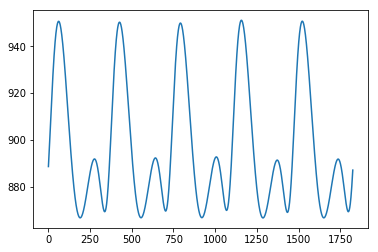

In [46]:
plt.plot(range(0, len(days)), days)

In [37]:
newark_df['clear_sky'] = result

In [38]:
newark_df

,YYYY-MM-DD,HH:MM (LST),Zenith (deg),Azimuth (deg),ETR (Wh/m^2),ETRN (Wh/m^2),Glo Mod (Wh/m^2),Glo Mod Unc (%),Glo Mod Source,Dir Mod (Wh/m^2),...,Ceil Hgt Flg,Liq Precip Depth (mm),Liq Precip Depth Flg,Liq Precip Quantity (hours),Liq Precip Quantity Flg,Precip Wat (cm),Precip Wat Flg,AOD (unitless),AOD Flg,clear_sky
2006-01-01 01:00:00,2006-01-01,1:00,99.0,-99.0,0,0,0,0,2,0,...,1,0,5,1,99,1.2,3,0.088,1,0.000000
2006-01-01 02:00:00,2006-01-01,2:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.2,51,0.088,1,0.000000
2006-01-01 03:00:00,2006-01-01,3:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.1,51,0.088,1,0.000000
2006-01-01 04:00:00,2006-01-01,4:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.1,3,0.088,1,0.000000
2006-01-01 05:00:00,2006-01-01,5:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.1,51,0.088,1,0.000000
2006-01-01 06:00:00,2006-01-01,6:00,99.0,-99.0,0,0,0,0,2,0,...,5,0,5,1,99,1.0,51,0.088,1,0.000000
2006-01-01 07:00:00,2006-01-01,7:00,99.0,-99.0,0,0,0,0,2,0,...,5,3,1,24,99,1.0,3,0.088,1,0.000000
2006-01-01 08:00:00,2006-01-01,8:00,87.3,123.6,42,884,12,9,2,87,...,5,0,5,1,99,1.0,51,0.088,1,242.426180
2006-01-01 09:00:00,2006-01-01,9:00,80.2,132.2,240,1415,139,9,2,284,...,5,0,5,1,99,1.0,51,0.088,1,674.672601
2006-01-01 10:00:00,2006-01-01,10:00,72.7,144.0,421,1415,201,9,2,238,...,5,0,5,1,99,1.1,3,0.088,1,823.361463
